In [1]:
import pandas as pd

In [3]:
f_avg = pd.read_csv("data/gee/FAPAR_avg.csv")
f_std = pd.read_csv("data/gee/FAPAR_std.csv")
lday_avg = pd.read_csv("data/gee/LST_Day_avg.csv")
lday_std = pd.read_csv("data/gee/LST_Day_std.csv")
lnig_avg = pd.read_csv("data/gee/LST_Night_avg.csv")
lnig_std = pd.read_csv("data/gee/LST_Night_std.csv")
n_avg = pd.read_csv("data/gee/NDVI_avg.csv")
n_std = pd.read_csv("data/gee/NDVI_std.csv")
ntl_avg = pd.read_csv("data/gee/NTL_avg.csv")
ntl_std = pd.read_csv("data/gee/NTL_std.csv")

f_avg = f_avg.rename(columns={'mean':'FAPAR_avg'})
f_std = f_std.rename(columns={'stdDev':'FAPAR_std'})
lday_avg = lday_avg.rename(columns={'mean':'lst_day_avg'})
lday_std = lday_std.rename(columns={'stdDev':'lst_day_std'})
lnig_avg = lnig_avg.rename(columns={'mean':'lst_night_avg'})
lnig_std = lnig_std.rename(columns={'stdDev':'lst_night_std'})
n_avg = n_avg.rename(columns={'mean':'ndvi_avg'})
n_std = n_std.rename(columns={'stdDev':'ndvi_std'})
ntl_avg = ntl_avg.rename(columns={'mean':'ntl_avg'})
ntl_std = ntl_std.rename(columns={'stdDev':'ntl_std'})

df = pd.merge(f_avg,f_std, on='Grid_ID')\
.merge(lday_avg, on='Grid_ID')\
.merge(lday_std, on='Grid_ID')\
.merge(lnig_avg, on='Grid_ID')\
.merge(lnig_std, on='Grid_ID')\
.merge(n_avg, on='Grid_ID')\
.merge(n_std, on='Grid_ID')\
.merge(ntl_avg, on='Grid_ID')\
.merge(ntl_std, on='Grid_ID')

df = df[[col for col in df.columns if any(key in col for key in ['avg','std','ID'])]]
ant = pd.read_csv("antipolo_grid.csv")

df = pd.merge(df, ant, on='Grid_ID')
df.to_csv('gee_data.csv', index=False)

In [38]:
src

<open DatasetReader name='2-0000027648-0000027648.tif' mode='r'>

In [39]:
import numpy as np
import rasterio
import rasterio.plot
import matplotlib.pyplot as plt

src = rasterio.open('5 (1).tif').read()

In [40]:
rasterio.plot.reshape_as_image(src).shape

(1506, 1505, 3)

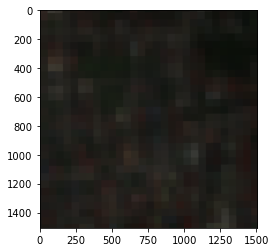

<AxesSubplot:>

In [42]:

rasterio.plot.show(np.array([src[2],src[1],src[0]]), adjust='linear')

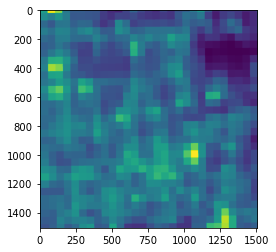

In [12]:
plt.imshow(src.read()[0])

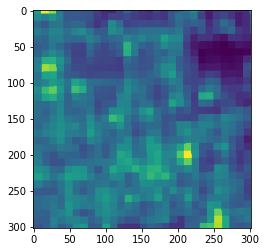

In [13]:
plt.imshow(rasterio.open('5.tif').read()[0])